In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from datetime import date

##csv usados
df = pd.read_csv("votacoes-2022.csv", sep=';')
dfV = pd.read_csv("votacoesVotos-2022.csv", sep=';')
dfO =  pd.read_csv("votacoesOrientacoes-2022.csv", sep=';')
deputados = pd.read_csv("deputados.csv", sep=';')

themes =  pd.read_csv("proposicoesTemas-2022.csv", sep=';')

### Functions

In [3]:
## Para identificar tipos de sexo no plot
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='F':
            cols.append('red')
        elif l=='M':
            cols.append('blue')
        else:
            cols.append('green')
    return cols

## Para identificar tipos de idade no plot
def pltcolorA(lst):
    cols=[]
    for l in lst:
        if l > 70:
            cols.append('red')
        elif 50 <l<70:
            cols.append('blue')
        elif 30 <l< 50:
            cols.append('yellow')
        else:
            cols.append('green')
    return cols

def pltcolorM(lst):
    cols=[]
    for l in lst:
        if l == 42:
            cols.append('red')
        elif l==43:
            cols.append('blue')
        elif l==44:
            cols.append('magenta')
        elif l==38:
            cols.append('cyan')
        elif l==16:
            cols.append('yellow')
        elif l==47:
            cols.append('black')
        elif l==2:
            cols.append('grey')
        elif l==3:
            cols.append('brown')    
        else:
            cols.append('green')
    return cols

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Function to map deputado com score de concordancia com o partido
def pltt(df):
    # # Create figure with plot
    fig = plt.figure() #Here is your error
    plt.scatter(df["deputado_enc"],df["score_accordingly"])
#     fig.set_size_inches(18.5, 10.5)
    return plt.show()

# Function to map deputado com score de concordancia com o partido, tendo em conta o sexo
def pltS(df, topic):
    # Create the colors list using the function above
    cols=pltcolor(df[topic])
    # # Create figure with plot
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.scatter(df["deputado_enc"],df["score_accordingly"],  c=cols, s=100)
    
    # Creating legend with color box
    pop_a = mpatches.Patch(color='red', label='F')
    pop_b = mpatches.Patch(color='blue', label='M')
    plt.legend(handles=[pop_a,pop_b])
    
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    return plt.show()

# Function to map deputado com score de concordancia com o partido, tendo em conta a idade
def pltA(df, topic):
    # Create the colors list using the function above
    cols=pltcolorA(df[topic])
    # # Create figure with plot
    fig = plt.figure() 
    ax1 = fig.add_subplot(2,2,1)
    ax1.scatter(df["deputado_enc"],df["score_accordingly"],  c=cols, s=100)
   
    # Creating legend with color box
    pop_a = mpatches.Patch(color='red', label='> 70 anos')
    pop_b = mpatches.Patch(color='blue', label=']50,70] anos')
    pop_c = mpatches.Patch(color='yellow', label=']30,50] anos')
    pop_d = mpatches.Patch(color='green', label='< 30 anos')
    plt.legend(handles=[pop_a,pop_b,pop_c,pop_d])            
                
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    return plt.show()


##### ----------------------------------------------------------- .. -------------------------------------------------------
#
#              FAZER FUNÇAO PARA DESCREVER A MESMA COISA MAS COM OS MUNICIPIOS DE NASCIMENTO DE CADA DEPUTADO
#

# Function to map deputado com score de concordancia com o partido, tendo em conta o municipio
def pltM(df, topic):
    # Create the colors list using the function above
    cols=pltcolorM(df[topic])
    # # Create figure with plot
    fig = plt.figure() 
    ax1 = fig.add_subplot(2,2,1)
    ax1.scatter(df["deputado_enc"],df["score_accordingly"],  c=cols, s=100)
   
    # Creating legend with color box
    pop_a = mpatches.Patch(color='red', label='Rio de Janeiro')
    pop_b = mpatches.Patch(color='blue', label='São Paulo')
    pop_c = mpatches.Patch(color='magenta', label='SAlvador')
    pop_d = mpatches.Patch(color='cyan', label='REcife')
    pop_e = mpatches.Patch(color='yellow', label='Fortaleza')
    pop_f = mpatches.Patch(color='black', label='Sao Luis')
    pop_g = mpatches.Patch(color='grey', label='Belem')
    pop_h = mpatches.Patch(color='brown', label='Brasilia')
    pop_i = mpatches.Patch(color='green', label='Outros')

    plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e,pop_f,pop_g,pop_h, pop_i])            
                
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    return plt.show()

# Function to map  deputado com score de concordancia com o partido, tendo em conta o municipio -- bar plot
def pltMBar(df, topic):
    g=sns.catplot(x=topic, y="score_accordingly",data=df)
    g.fig.set_figwidth(15)
    g.fig.set_figheight(7)
    plt.xticks(rotation=90)
    plt.ylim((0,100))
    return plt.show()

In [5]:
## Data preprocessing for ML 
def prepareDataForML(df):
    
    # Count the number of times each voting orientation occurred
    voting = df["new"].value_counts()
  
    ## Calculate the percentage of deputies who vote according to the party sum of all times 
    ## they agree divided by the number of times they voted => percentage
    percent = (df.groupby('deputado_nome')['new'].sum())/df['deputado_nome'].value_counts()
    pdAcord = pd.DataFrame({'deputado_nome':df['deputado_nome'].unique().tolist(),'score_accordingly': round(percent*100,2)})
    
    # Merge the calculated agreement score with the original dataframe
    dfPL = pd.merge(df,pdAcord, on ='deputado_nome')
    
    # Create encoder and label encoder objects
    encoder = OneHotEncoder() 
    label_encoder = LabelEncoder()
    
    # Encode the deputy names, birthplace, and voting orientation
    encoded_deputados = label_encoder.fit_transform(dfPL['deputado_nome'])
    encoded_gender = label_encoder.fit_transform(dfPL['siglaSexo'])
    encoded_municipios = label_encoder.fit_transform(dfPL['municipioNascimento'])
    encoded_orientacao = label_encoder.fit_transform(dfPL['orientacao'])
    encoded_vote = label_encoder.fit_transform(dfPL['voto'])

    
    
    # Add the encoded values to the dataframe
    dfPL['deputado_enc'] = encoded_deputados
    dfPL['orientacao_enc'] = encoded_orientacao
    dfPL['gender_enc'] = encoded_gender
    dfPL['vote_enc'] = encoded_vote
    
    
    return dfPL

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#dataframe focado para um partido politico, para fazer plt, com o score de concordancia
def voteType(party):
    party = df2.loc[df2["deputado_siglaPartido"] == party]
    voting = party["new"].value_counts()
  
    ##percentagem de deputados que votam de acordo com o partido
    ## soma de todos as vezes que concordam  a dividir pela quantidade de vezes que votou => percentagem
    percent = (party.groupby('deputado_nome')['new'].sum())/party['deputado_nome'].value_counts()
    pdAcord = pd.DataFrame({'deputado_nome':party['deputado_nome'].unique().tolist(),'score_accordingly': round(percent*100,2)})
    dfPL = pd.merge(party,pdAcord, on ='deputado_nome')
    encoder = OneHotEncoder()
    # integer encode
    label_encoder = LabelEncoder()
    encoded_deputados = label_encoder.fit_transform(dfPL['deputado_nome'])
    encoded_municipios = label_encoder.fit_transform(dfPL['municipioNascimento'])

#     dfPL['municipio_enc'] = encoded_municipios
    dfPL['deputado_enc'] = encoded_deputados
    return  dfPL



##dicionario para municipios ---- ver se util
def dictMunc(dfPL):
    dictMunicipio = pd.DataFrame({"municNascime":dfPL["municipioNascimento"].unique().tolist(),'enc': dfPL["municipio_enc"].unique().tolist()})
    dictMunicipio.sort_values('enc', inplace=True)
    return dictMunicipio

#### dataframe for proposals that were voted in the year 2022

In [7]:
df = df.drop(['uri', 'data', 'dataHoraRegistro', 'idOrgao', 'uriOrgao',
         'uriEvento','descricao' , 'ultimaAberturaVotacao_dataHoraRegistro',
       'ultimaAberturaVotacao_descricao',
       'ultimaApresentacaoProposicao_dataHoraRegistro',
       'ultimaApresentacaoProposicao_descricao',
       'ultimaApresentacaoProposicao_idProposicao',
       'ultimaApresentacaoProposicao_uriProposicao'], axis=1)

In [8]:
df.columns = ['idVotacao', 'siglaOrgao', 'idEvento', 'aprovacao', 'votosSim', 'votosNao',
       'votosOutros']

##Retirar variaveis que nao vao ser usadas para estudar;
df = df.drop([ 'votosSim', 'votosNao','votosOutros'], axis=1)
df

,idVotacao,siglaOrgao,idEvento,aprovacao
0,2276475-116,PLEN,64635,1.0
1,2236607-112,PLEN,64635,0.0
2,2276475-96,PLEN,64635,0.0
3,2276475-107,PLEN,64635,1.0
4,2276475-111,PLEN,64635,1.0
...,...,...,...,...
3834,2314962-21,SECAP(SGM),0,1.0
3835,2314962-22,SECAP(SGM),0,1.0
3836,2314962-23,SECAP(SGM),0,1.0
3837,2314962-24,PLEN,0,1.0


#### dataframe for proposals that were voted in the year 2022, with the name and the party of each deputee

In [9]:
dfV.columns
dfV = dfV.drop(['dataHoraVoto', 'deputado_uri','deputado_uriPartido', 'deputado_siglaUf', 'deputado_idLegislatura',
       'deputado_urlFoto'], axis=1)
dfV[:5]

,idVotacao,uriVotacao,voto,deputado_id,deputado_nome,deputado_siglaPartido
0,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,204521,Abou Anni,UNIÃO
1,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,204528,Adriana Ventura,NOVO
2,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,121948,Adriano do Baldy,PP
3,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,74646,Aécio Neves,PSDB
4,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,141372,Aelton Freitas,PP


In [10]:
themes

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia
0,https://dadosabertos.camara.leg.br/api/v2/prop...,CON,1,2022,53,Processo Legislativo e Atuação Parlamentar,0
1,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,1,2022,41,Cidades e Desenvolvimento Urbano,0
2,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,1,2022,57,Defesa e Segurança,0
3,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,1,2022,70,Finanças Públicas e Orçamento,0
4,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,1,2022,48,Meio Ambiente e Desenvolvimento Sustentável,0
...,...,...,...,...,...,...,...
9755,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3059,2022,70,Finanças Públicas e Orçamento,0
9756,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3059,2022,55,Relações Internacionais e Comércio Exterior,0
9757,https://dadosabertos.camara.leg.br/api/v2/prop...,EMS,3062,2022,66,"Indústria, Comércio e Serviços",0
9758,https://dadosabertos.camara.leg.br/api/v2/prop...,EMS,3062,2022,48,Meio Ambiente e Desenvolvimento Sustentável,0


#### dataframe for each deputee that ever participated in a voting event

In [11]:
# deputados.columns
deputados = deputados.drop(['uri', 'nomeCivil', 'cpf', 'urlRedeSocial', 'urlWebsite', 'ufNascimento'], axis=1)

In [12]:
today = date.today()
today.year

##PARA DEPUTADOS APARTIR DA LEGISLATURA 54º
deputados = deputados[deputados["idLegislaturaInicial"] > 54]
deputados.loc[deputados["dataFalecimento"].isna(), "dataFalecimento"] = today

deputados["dataFalecimento"] = pd.to_datetime(deputados["dataFalecimento"], errors = 'coerce')
deputados["dataNascimento"] = pd.to_datetime(deputados["dataNascimento"], errors = 'coerce')
deputados["idade"] =  ((deputados["dataFalecimento"] - deputados["dataNascimento"]).astype('<m8[Y]') )
deputados = deputados.drop(['dataFalecimento', 'dataNascimento'], axis=1)

In [13]:
deputados.columns = ['deputado_nome', 'idLegislaturaInicial', 'idLegislaturaFinal', 'siglaSexo',
       'municipioNascimento', 'idade']
deputados

,deputado_nome,idLegislaturaInicial,idLegislaturaFinal,siglaSexo,municipioNascimento,idade
0,Abílio Santana,56,56,M,Salvador,58.0
1,Abou Anni,56,56,M,São Paulo,56.0
2,Acácio Favacho,56,56,M,Macapá,39.0
3,Adolfo Viana,56,56,M,Salvador,42.0
4,Adriana Ventura,56,56,F,São Paulo,54.0
...,...,...,...,...,...,...
931,WILSON BESERRA,55,55,M,Rio de Janeiro,53.0
934,XUXU DAL MOLIN,55,55,M,Realeza,47.0
937,ZECA CAVALCANTI,55,55,M,Arcoverde,56.0
938,ZECA DO PT,55,55,M,Porto Murtinho,73.0


In [14]:
dfO.columns
dfO = dfO.drop(['uriVotacao','descricao', 'siglaBancada',
       'uriBancada','siglaOrgao'], axis=1)

In [15]:
dfO

,idVotacao,orientacao
0,2314962-33,Sim
1,2314962-33,Sim
2,2314962-33,Sim
3,2314962-33,Sim
4,2314962-33,Sim
...,...,...
12034,2312874-9,Sim
12035,2312874-9,Sim
12036,2312874-9,Obstrução
12037,2312874-9,Sim


In [16]:
## datatset with voting and orientation of each party for each voting id
df_resumo = pd.merge(df,dfV, on ='idVotacao')
df_resumo = pd.merge(df_resumo,dfO, on ='idVotacao')
df_resumo = pd.merge(df_resumo, deputados, on ='deputado_nome')
df_resumo

,idVotacao,siglaOrgao,idEvento,aprovacao,uriVotacao,voto,deputado_id,deputado_nome,deputado_siglaPartido,orientacao,idLegislaturaInicial,idLegislaturaFinal,siglaSexo,municipioNascimento,idade
0,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,NaN,56,56,M,Salvador,58.0
1,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,NaN,56,56,M,Salvador,58.0
2,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Não,56,56,M,Salvador,58.0
3,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Liberado,56,56,M,Salvador,58.0
4,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Sim,56,56,M,Salvador,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006451,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0
3006452,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0
3006453,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0
3006454,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0


In [17]:
##percentagem de valores NULL no dataset
percent= df_resumo.isnull().sum() * 100 / len(df_resumo)
missing_value = pd.DataFrame({'percent_missing': percent})
missing_value.sort_values('percent_missing', inplace=True)

In [18]:
df_resumo.loc[df_resumo["aprovacao"].isna(), "aprovacao"] = 2
df2=df_resumo.dropna(axis=0)

In [19]:
df2

,idVotacao,siglaOrgao,idEvento,aprovacao,uriVotacao,voto,deputado_id,deputado_nome,deputado_siglaPartido,orientacao,idLegislaturaInicial,idLegislaturaFinal,siglaSexo,municipioNascimento,idade
2,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Não,56,56,M,Salvador,58.0
3,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Liberado,56,56,M,Salvador,58.0
4,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Sim,56,56,M,Salvador,58.0
7,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Obstrução,56,56,M,Salvador,58.0
8,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Sim,56,56,M,Salvador,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006451,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0
3006452,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0
3006453,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0
3006454,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,205535,Patricia Ferraz,PODE,Sim,56,56,F,Belo Horizonte,43.0


In [ ]:
df2[['deputado_id', 'idVotacao', 'voto']].value_counts().to_frame().rename(columns={0:'repetitions'})

In [20]:
df2 = df2.drop_duplicates(subset=['deputado_id', 'idVotacao', 'voto'], keep='first').reset_index(drop=True)

In [21]:
df2[['deputado_id', 'idVotacao', 'voto']].value_counts().to_frame().rename(columns={0:'repetitions'})

repetitions
deputado_id idVotacao  voto             
66179       105464-319 Não             1
204473      2298445-77 Não             1
            2306112-59 Sim             1
            2301321-40 Sim             1
            2301088-74 Sim             1
...                                  ...
194260      2318736-85 Não             1
            2318736-82 Sim             1
            2318736-79 Não             1
            2318736-62 Não             1
220008      596844-116 Sim             1

[112156 rows x 1 columns]

In [22]:
##find values in cols where orientation and vote is equal
## if the value matches => 1 and if its different => 0
df2["new"] = np.where((df2['voto'] == df2['orientacao']), 1, 0)

In [24]:
df2 = prepareDataForML(df2)
df2

,idVotacao,siglaOrgao,idEvento,aprovacao,uriVotacao,voto,deputado_id,deputado_nome,deputado_siglaPartido,orientacao,...,idLegislaturaFinal,siglaSexo,municipioNascimento,idade,new,score_accordingly,deputado_enc,orientacao_enc,gender_enc,vote_enc
0,2312874-9,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Não,...,56,M,Salvador,58.0,0,72.56,2,1,1,4
1,46249-294,PLEN,64653,0.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,204554,Abílio Santana,PL,Não,...,56,M,Salvador,58.0,1,72.56,2,1,1,2
2,46249-297,PLEN,64653,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Sim,...,56,M,Salvador,58.0,1,72.56,2,3,1,4
3,46249-312,PLEN,64653,2.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,204554,Abílio Santana,PL,Não,...,56,M,Salvador,58.0,0,72.56,2,1,1,4
4,46249-316,PLEN,64653,0.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,204554,Abílio Santana,PL,Não,...,56,M,Salvador,58.0,1,72.56,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112151,2323617-49,PLEN,66394,2.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,122466,Ronaldo Martins,REPUBLICANOS,Liberado,...,56,M,São Paulo,45.0,0,68.00,317,0,1,4
112152,2323617-56,PLEN,66394,0.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,122466,Ronaldo Martins,REPUBLICANOS,Não,...,56,M,São Paulo,45.0,1,68.00,317,1,1,2
112153,2314962-33,PLEN,66455,1.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Sim,122466,Ronaldo Martins,REPUBLICANOS,Sim,...,56,M,São Paulo,45.0,1,68.00,317,3,1,4
112154,2326278-38,PLEN,66439,0.0,https://dadosabertos.camara.leg.br/api/v2/vota...,Não,205535,Patricia Ferraz,PODE,Não,...,56,F,Belo Horizonte,43.0,1,40.76,277,1,0,2


In [25]:
df2.to_csv('dataVoting.csv')

### PL - partido liberal

O Partido Liberal (PL), anteriormente conhecido como Partido da República (PR),[14] é um partido político brasileiro de direita[8] fundado e registrado oficialmente em 2006.[3][4] Atualmente detém a maior bancada na Câmara dos Deputados.[12] Como membro do chamado "Centrão",[15] o partido é base de apoio do atual governo do presidente Jair Bolsonaro 
https://pt.wikipedia.org/wiki/Partido_Liberal_(2006)

In [46]:
dfPL = voteType("PL")
print("Numero de deputados no partido: ", len(voteType("PL")['deputado_nome'].value_counts()))

Numero de deputados no partido:  71


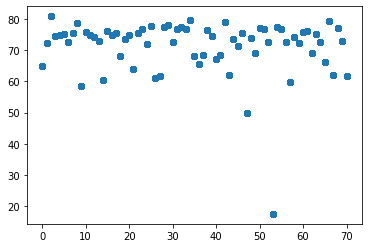

In [47]:
pltt(dfPL)

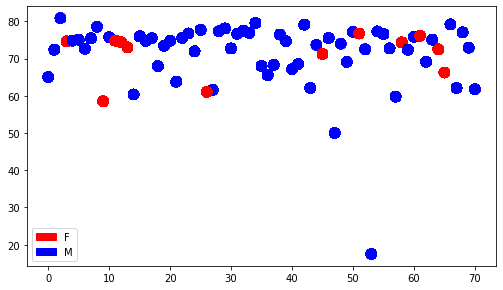

In [48]:
pltS(dfPL,"siglaSexo")

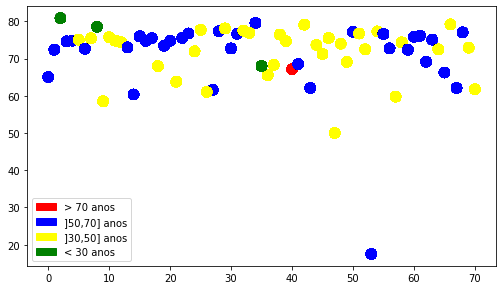

In [49]:
pltA(dfPL,"idade")

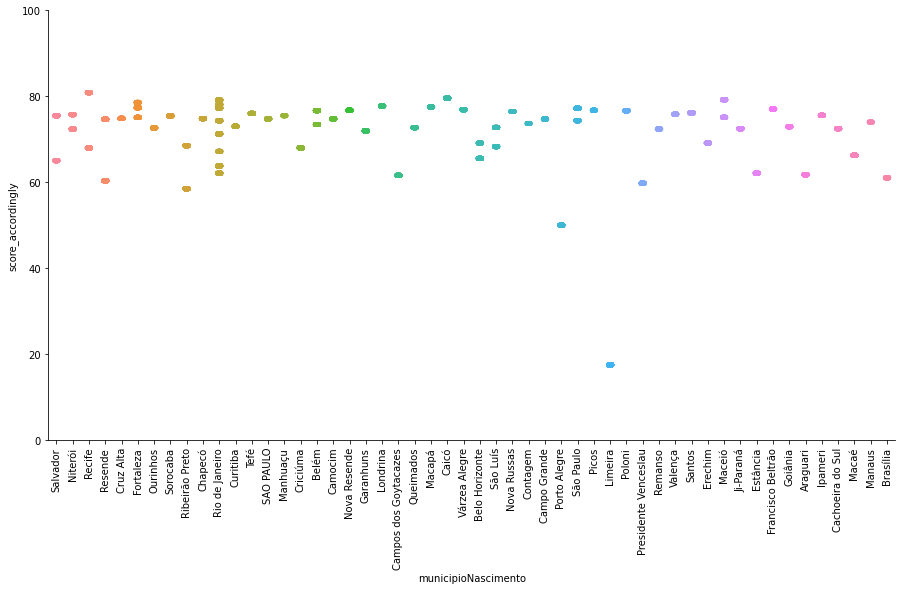

In [50]:
# pltM(dfPL,"municipio_enc")
pltMBar(dfPL,"municipioNascimento")

### PT - partido trabalhadores

O Partido dos Trabalhadores é um partido político brasileiro de centro-esquerda à esquerda.
https://pt.wikipedia.org/wiki/Partido_Liberal_(2006)

In [51]:
dfPT = voteType("PT")
print("Numero de deputados no partido: ", len(voteType("PT")['deputado_nome'].value_counts()))

Numero de deputados no partido:  27


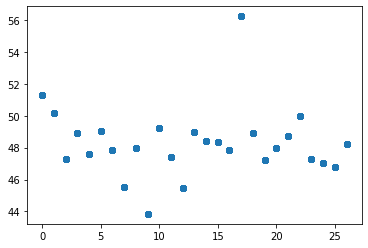

In [52]:
pltt(dfPT)

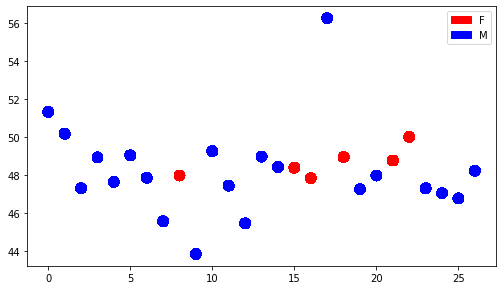

In [53]:
pltS(dfPT,"siglaSexo")

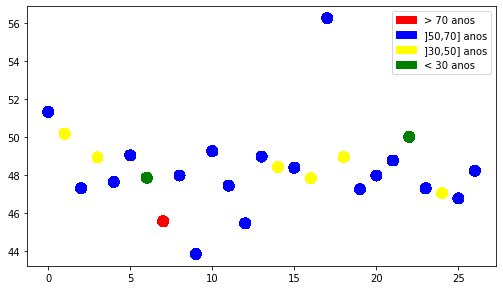

In [54]:
pltA(dfPT,"idade")

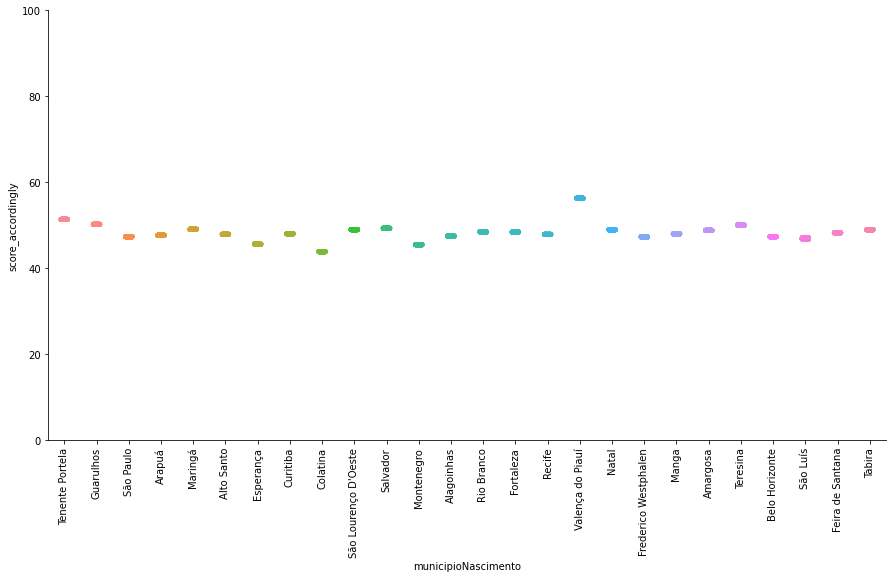

In [55]:
pltMBar(dfPT,"municipioNascimento")

### PP - progressistas 

O Progressistas é um partido político brasileiro de alinhamento entre a centro-direita e a direita.

In [56]:
dfPP = voteType("PP")
print("Numero de deputados no partido: ", len(voteType("PP")['deputado_nome'].value_counts()))

Numero de deputados no partido:  41


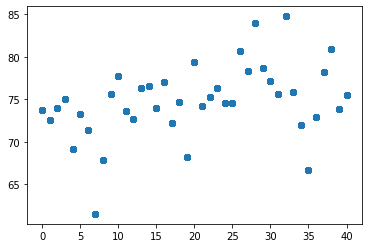

In [57]:
pltt(dfPP)

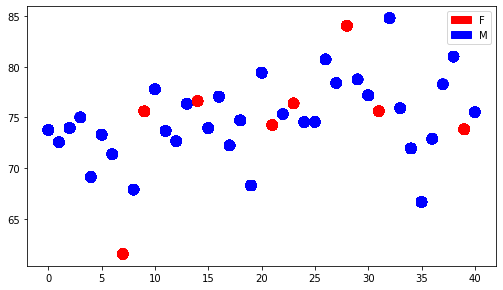

In [58]:
pltS(dfPP,"siglaSexo")

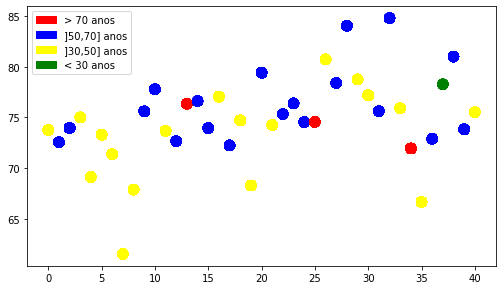

In [59]:
pltA(dfPP,"idade")

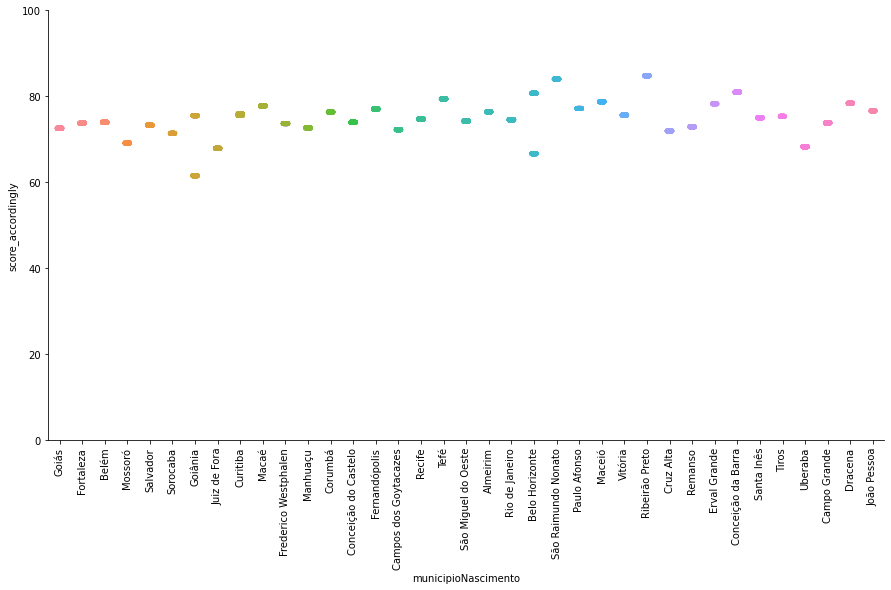

In [60]:
pltMBar(dfPP,"municipioNascimento")

### UNIAO 

União Brasil é um partido político brasileiro de centro-direita a direita que surgiu da fusão entre o Democratas e o Partido Social Liberal

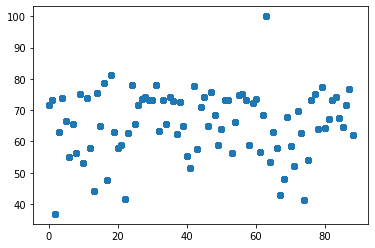

Numero de deputados no partido:  89


In [61]:
pltt(voteType("UNIÃO"))
print("Numero de deputados no partido: ", len(voteType("UNIÃO")['deputado_nome'].value_counts()))

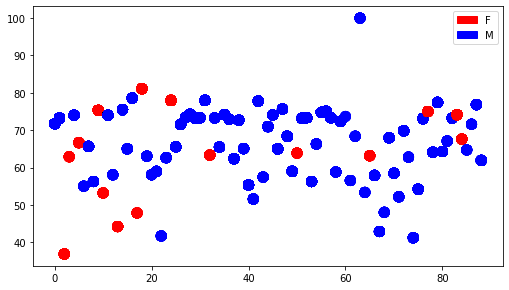

In [62]:
pltS(voteType("UNIÃO"),"siglaSexo")

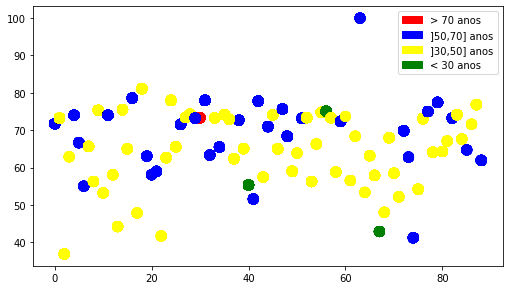

In [63]:
pltA(voteType("UNIÃO"),"idade")

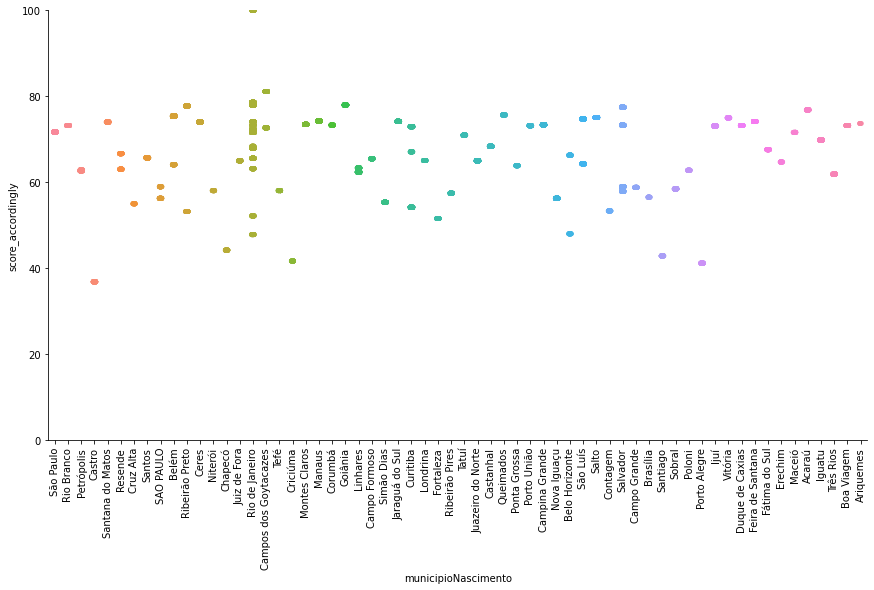

In [64]:
pltMBar(voteType("UNIÃO"),"municipioNascimento")

### PSD  - Partido Social Democrático

O partido se declara de Centro[13][14] e normalmente une se a partidos de esquerda e de direita. 

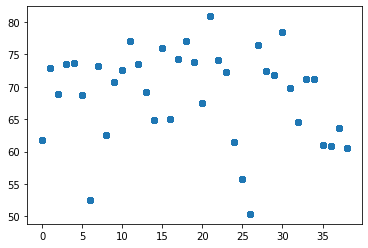

Numero de deputados no partido:  39


In [65]:
pltt(voteType("PSD"))
print("Numero de deputados no partido: ", len(voteType("PSD")['deputado_nome'].value_counts()))

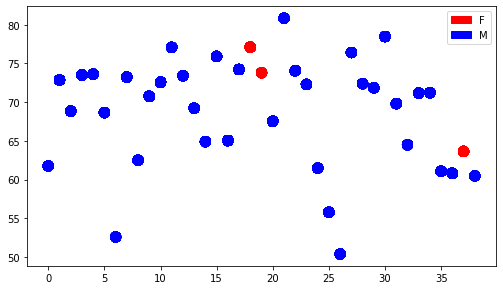

In [66]:
pltS(voteType("PSD"),"siglaSexo")

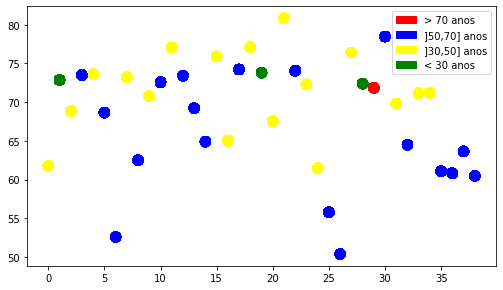

In [67]:
pltA(voteType("PSD"),"idade")

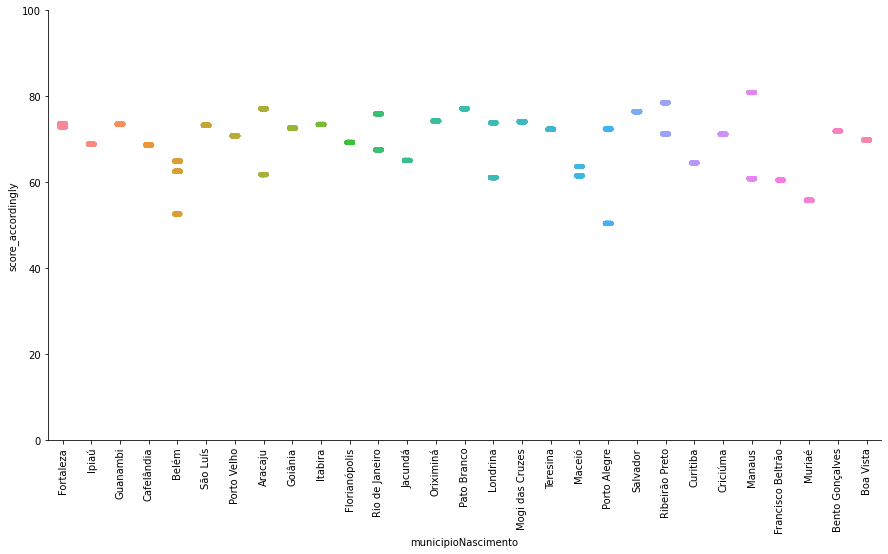

In [68]:
pltMBar(voteType("PSD"),"municipioNascimento")

### Republicanos

O Republicanos é um partido político brasileiro de direita.

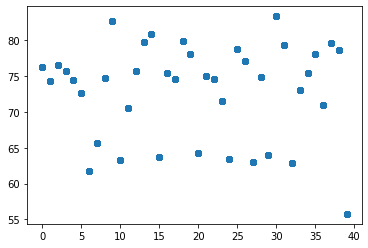

Numero de deputados no partido:  40


In [69]:
pltt(voteType("REPUBLICANOS"))
print("Numero de deputados no partido: ", len(voteType("REPUBLICANOS")['deputado_nome'].value_counts()))

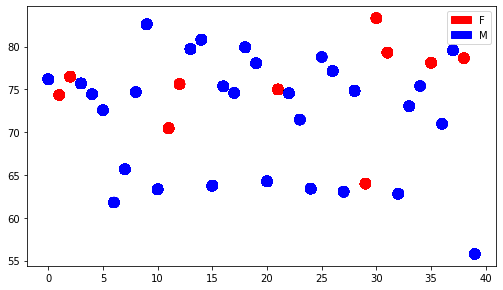

In [70]:
pltS(voteType("REPUBLICANOS"),"siglaSexo")

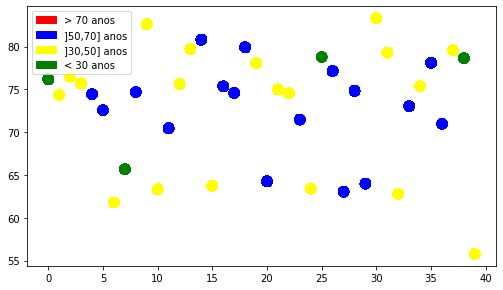

In [71]:
pltA(voteType("REPUBLICANOS"),"idade")

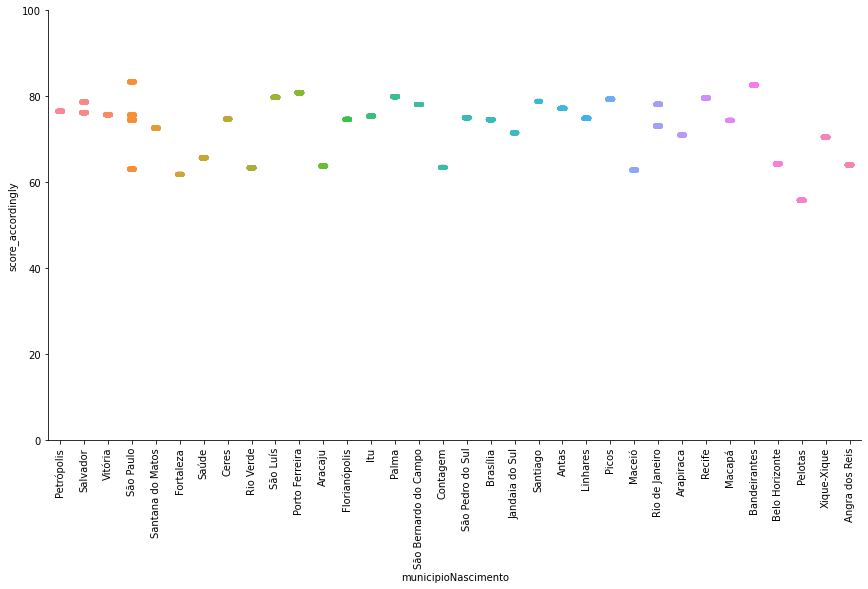

In [72]:
pltMBar(voteType("REPUBLICANOS"),"municipioNascimento")

### Movimento Democrático Brasileiro

O Movimento Democrático Brasileiro (MDB) é um partido político brasileiro de centro. Considerado um partido "guarda-chuva" de ideologias diversas;

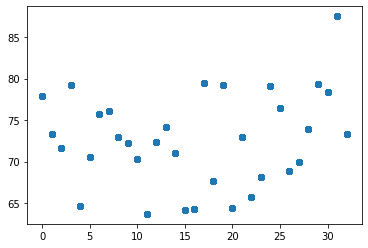

Numero de deputados no partido:  33


In [73]:
pltt(voteType("MDB"))
print("Numero de deputados no partido: ", len(voteType("MDB")['deputado_nome'].value_counts()))

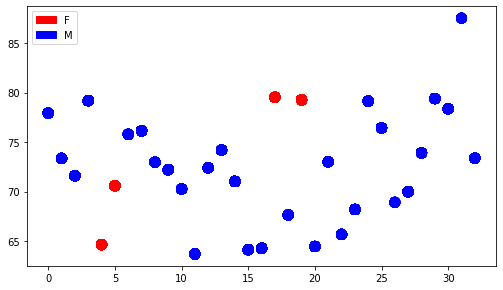

In [74]:
pltS(voteType("MDB"),"siglaSexo")

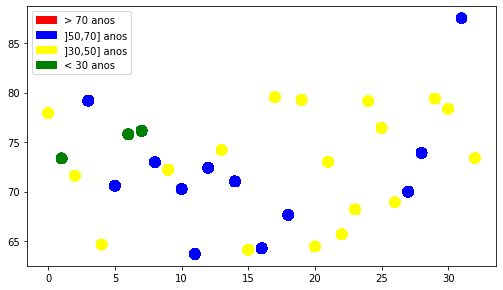

In [75]:
pltA(voteType("MDB"),"idade")

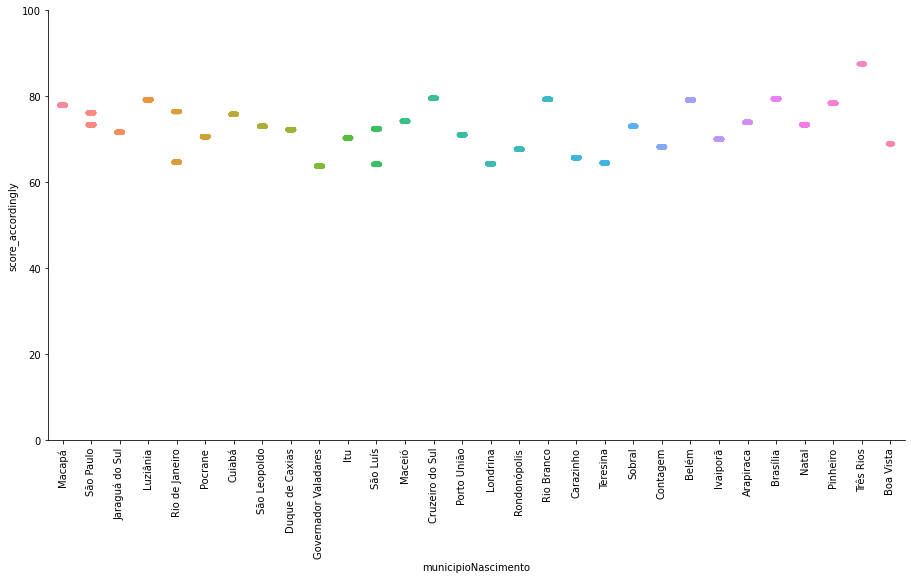

In [76]:
pltMBar(voteType("MDB"),"municipioNascimento")

### PDT

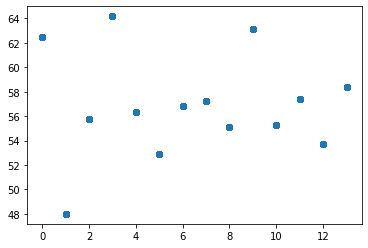

Numero de deputados no partido:  14


In [77]:
pltt(voteType("PDT"))
print("Numero de deputados no partido: ", len(voteType("PDT")['deputado_nome'].value_counts()))

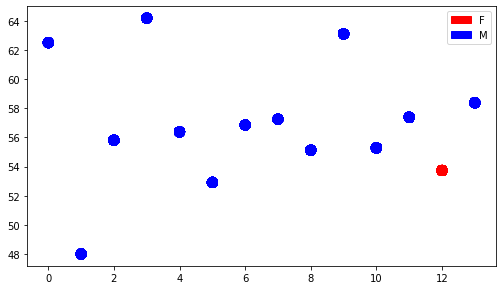

In [78]:
pltS(voteType("PDT"),"siglaSexo")

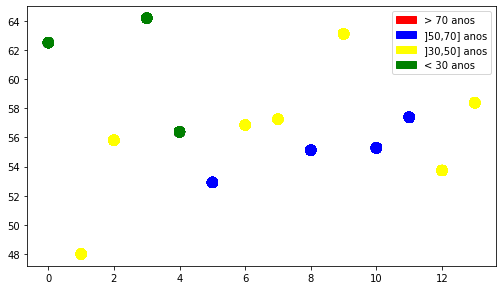

In [79]:
pltA(voteType("PDT"),"idade")

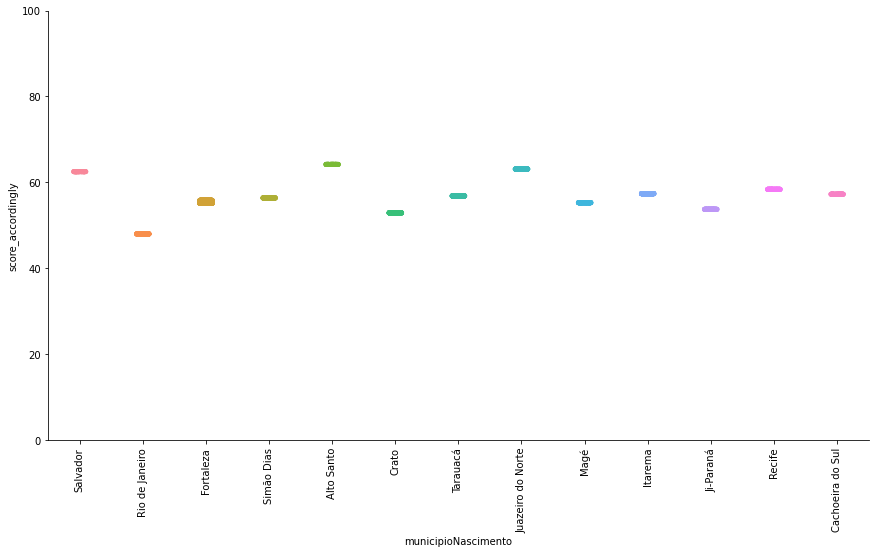

In [80]:
pltMBar(voteType("PDT"),"municipioNascimento")